# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [13]:
# create dataframe

websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [14]:
# To check how the dataset looks like, use command df.head()

websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [15]:
# To check the datatypes and nulls, use command df.info

websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [16]:
# Column that contains the feature that we wantt to predict
# 1 is code standing for Malicious
# 0 is code standing for Benign

y = websites['Type']
y.value_counts()

0    1565
1     216
Name: Type, dtype: int64

In [17]:
# Categorical data
# There are 7 categorical data 

categorical = websites.select_dtypes('object')
len(categorical.columns)

7

In [18]:
# First column, 'URL'
# 1781 different categories - no possibility to transform to ordinal

len(categorical.iloc[:,0].value_counts())

1781

In [19]:
# Second column, 'CHARSET'
# Upper case for all the rows

categorical.iloc[:,1] = categorical.iloc[:,1].apply(lambda x: x.upper())

C:\Users\carlo\anaconda3\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [20]:
# Third column, 'SERVER'
# 299 different categories - no possibility to transform to ordinal

len(categorical.iloc[:,2].value_counts())

239

In [21]:
# Fourth columns, 'WHOIS_COUNTRY'
# 49 different categories - no possibility to transform to ordinal
# On the other hand, the values are many counts allocated in just a few labels
# Same conclusion would apply to column 5, 'WHOIS_STATEPRO',

len(categorical.iloc[:,3].value_counts())

49

In [22]:
# Sixth columns, 'WHOIS_REGDATE'
# 891 different categories - no possibility to transform to ordinal
# Same conclusion would apply to column 7, 'WHOIS_UPDATED_DATE'

len(categorical.iloc[:,5].value_counts())

891

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [23]:
# Encapsule numeric data
numeric = websites.select_dtypes(include='number')

# Correlation matrix
numeric.corr()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


<AxesSubplot:>

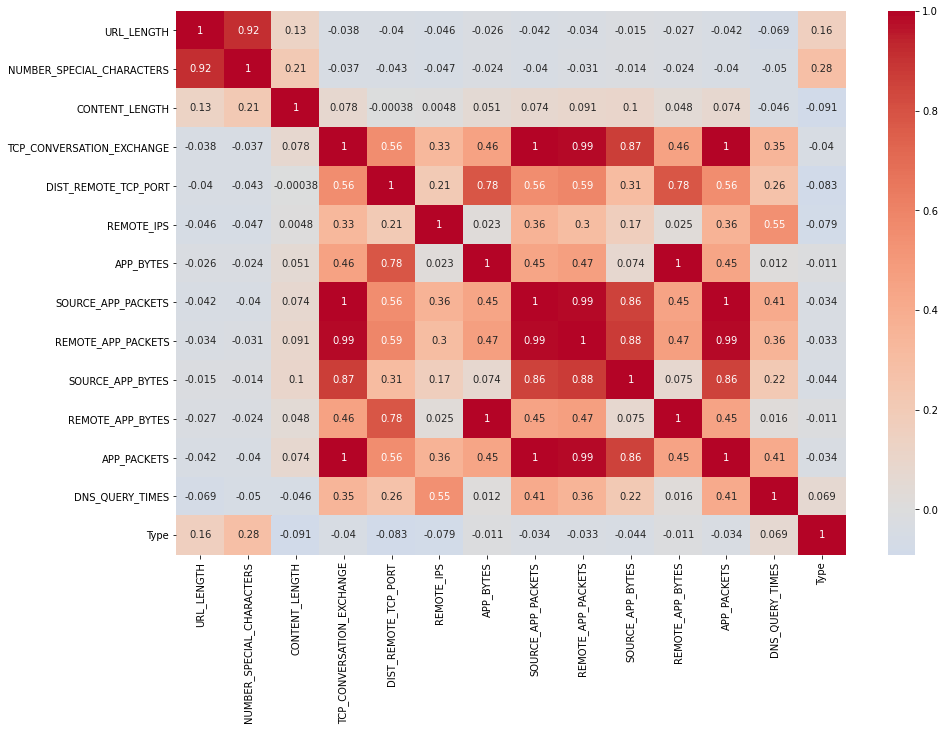

In [24]:
# Import seaborn
import seaborn as sns

# Create heatmap
plt.subplots(1,1,figsize=(15,10))
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm', center=0)

In [25]:
# TCP_CONVERSATION_EXCHANGE, SOURCE_APP_PACKETS and APP_PACKETS are 100% correlated

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [26]:
# Import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# Numeric columns minus target and CONTENT_LENGTH (half of them are null)
numeric2 = numeric.drop(columns=['Type', 'CONTENT_LENGTH']).dropna()

# For all columns - for loop + VIF
[(variance_inflation_factor(numeric2.values, i), numeric2.columns[i]) for i in range(len(numeric2.columns))]

C:\Users\carlo\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[(34.49120245872977, 'URL_LENGTH'),
 (35.99539961477181, 'NUMBER_SPECIAL_CHARACTERS'),
 (21212.999096023665, 'TCP_CONVERSATION_EXCHANGE'),
 (4.785802912815888, 'DIST_REMOTE_TCP_PORT'),
 (3.3700692653187394, 'REMOTE_IPS'),
 (12440284.165356902, 'APP_BYTES'),
 (inf, 'SOURCE_APP_PACKETS'),
 (161.80188676528243, 'REMOTE_APP_PACKETS'),
 (33.704972622919854, 'SOURCE_APP_BYTES'),
 (12443289.006273668, 'REMOTE_APP_BYTES'),
 (inf, 'APP_PACKETS'),
 (471.08818356780336, 'DNS_QUERY_TIMES')]

<AxesSubplot:>

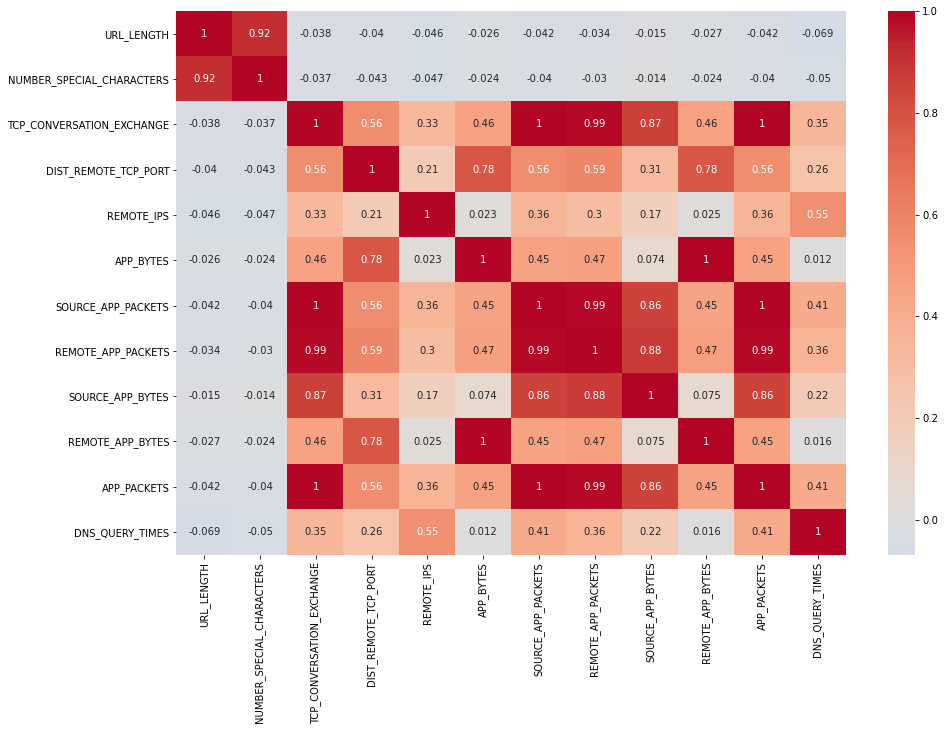

In [27]:
# Create heatmap
plt.subplots(1,1,figsize=(15,10))
sns.heatmap(numeric2.corr(), annot=True, cmap='coolwarm', center=0)

In [28]:
# Delete highest columns - 'SOURCE_APP_PACKETS' & 'APP_PACKETS'
numeric2.drop(columns='SOURCE_APP_PACKETS', inplace = True)
websites.drop(columns='SOURCE_APP_PACKETS', inplace = True)

# For all columns - for loop + VIF
[(variance_inflation_factor(numeric2.values, i), numeric2.columns[i]) for i in range(len(numeric2.columns))]

[(34.49120245872977, 'URL_LENGTH'),
 (35.99539961477181, 'NUMBER_SPECIAL_CHARACTERS'),
 (21212.999096023665, 'TCP_CONVERSATION_EXCHANGE'),
 (4.785802912815888, 'DIST_REMOTE_TCP_PORT'),
 (3.370069265318738, 'REMOTE_IPS'),
 (12440284.165356902, 'APP_BYTES'),
 (161.80188676528243, 'REMOTE_APP_PACKETS'),
 (33.704972622919854, 'SOURCE_APP_BYTES'),
 (12443289.006273668, 'REMOTE_APP_BYTES'),
 (22995.910953875984, 'APP_PACKETS'),
 (471.08818356780336, 'DNS_QUERY_TIMES')]

<AxesSubplot:>

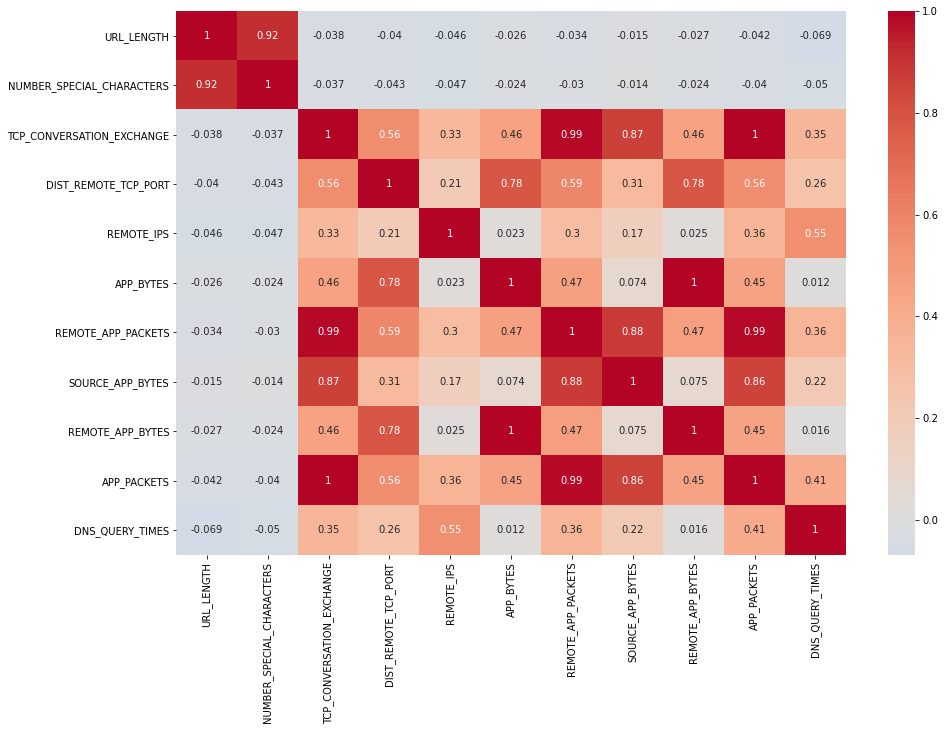

In [29]:
# Create heatmap
plt.subplots(1,1,figsize=(15,10))
sns.heatmap(numeric2.corr(), annot=True, cmap='coolwarm', center=0)

In [30]:
# Delete highest columns - 'REMOTE_APP_BYTES'
numeric2.drop(columns='REMOTE_APP_BYTES', inplace = True)
websites.drop(columns='REMOTE_APP_BYTES', inplace = True)

# For all columns - for loop + VIF
[(variance_inflation_factor(numeric2.values, i), numeric2.columns[i]) for i in range(len(numeric2.columns))]

[(33.144131732011466, 'URL_LENGTH'),
 (34.72620414181403, 'NUMBER_SPECIAL_CHARACTERS'),
 (21211.705251323867, 'TCP_CONVERSATION_EXCHANGE'),
 (4.667405027151291, 'DIST_REMOTE_TCP_PORT'),
 (3.3582830855523973, 'REMOTE_IPS'),
 (13.278538072751703, 'APP_BYTES'),
 (161.7567574595987, 'REMOTE_APP_PACKETS'),
 (33.59575494900852, 'SOURCE_APP_BYTES'),
 (22994.716681939943, 'APP_PACKETS'),
 (154.7557102063415, 'DNS_QUERY_TIMES')]

<AxesSubplot:>

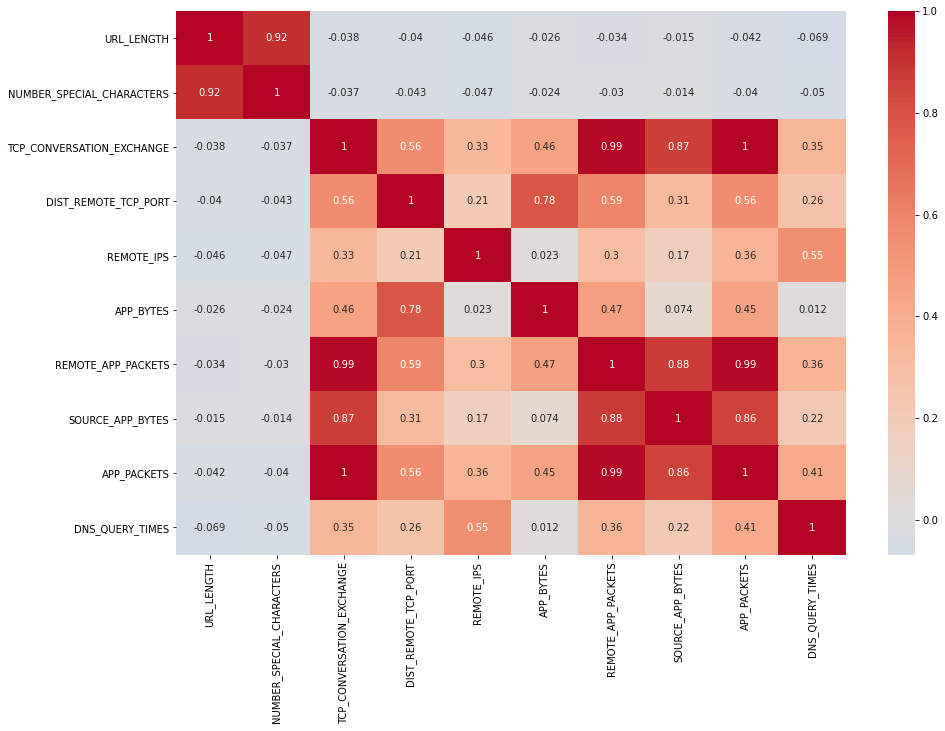

In [31]:
# Create heatmap
plt.subplots(1,1,figsize=(15,10))
sns.heatmap(numeric2.corr(), annot=True, cmap='coolwarm', center=0)

In [32]:
# Delete highest columns - 'SOURCE_APP_PACKETS' & 'APP_PACKETS'
numeric2.drop(columns='APP_PACKETS', inplace = True)
websites.drop(columns='APP_PACKETS', inplace = True)

# For all columns - for loop + VIF
[(variance_inflation_factor(numeric2.values, i), numeric2.columns[i]) for i in range(len(numeric2.columns))]

[(33.13083046731429, 'URL_LENGTH'),
 (34.7143278763855, 'NUMBER_SPECIAL_CHARACTERS'),
 (83.83783619207652, 'TCP_CONVERSATION_EXCHANGE'),
 (4.665348091118453, 'DIST_REMOTE_TCP_PORT'),
 (3.3524849603199125, 'REMOTE_IPS'),
 (13.27497971868018, 'APP_BYTES'),
 (161.7540688460013, 'REMOTE_APP_PACKETS'),
 (33.59386011799631, 'SOURCE_APP_BYTES'),
 (4.144100906785112, 'DNS_QUERY_TIMES')]

<AxesSubplot:>

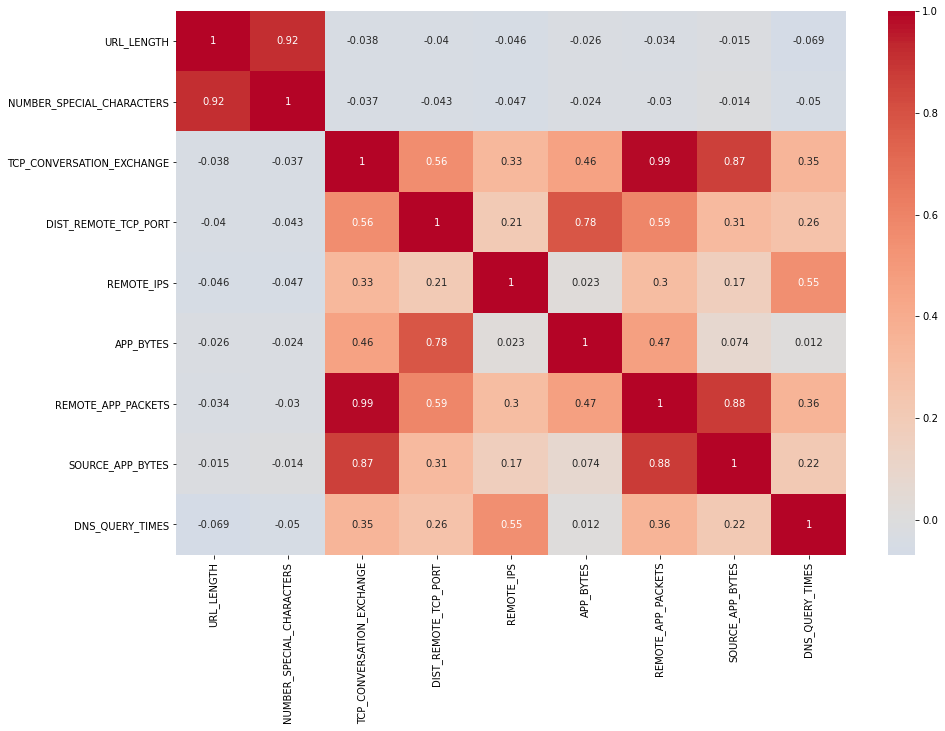

In [33]:
# Create heatmap
plt.subplots(1,1,figsize=(15,10))
sns.heatmap(numeric2.corr(), annot=True, cmap='coolwarm', center=0)

In [34]:
# Delete highest columns - 'REMOTE_APP_PACKETS'
numeric2.drop(columns='REMOTE_APP_PACKETS', inplace = True)
websites.drop(columns='REMOTE_APP_PACKETS', inplace = True)

# For all columns - for loop + VIF
[(variance_inflation_factor(numeric2.values, i), numeric2.columns[i]) for i in range(len(numeric2.columns))]

[(33.11998033750864, 'URL_LENGTH'),
 (34.611187442667685, 'NUMBER_SPECIAL_CHARACTERS'),
 (25.911534664477223, 'TCP_CONVERSATION_EXCHANGE'),
 (4.650496227265735, 'DIST_REMOTE_TCP_PORT'),
 (3.3355823599083227, 'REMOTE_IPS'),
 (9.625932623546657, 'APP_BYTES'),
 (17.527214356193397, 'SOURCE_APP_BYTES'),
 (3.15658892497816, 'DNS_QUERY_TIMES')]

<AxesSubplot:>

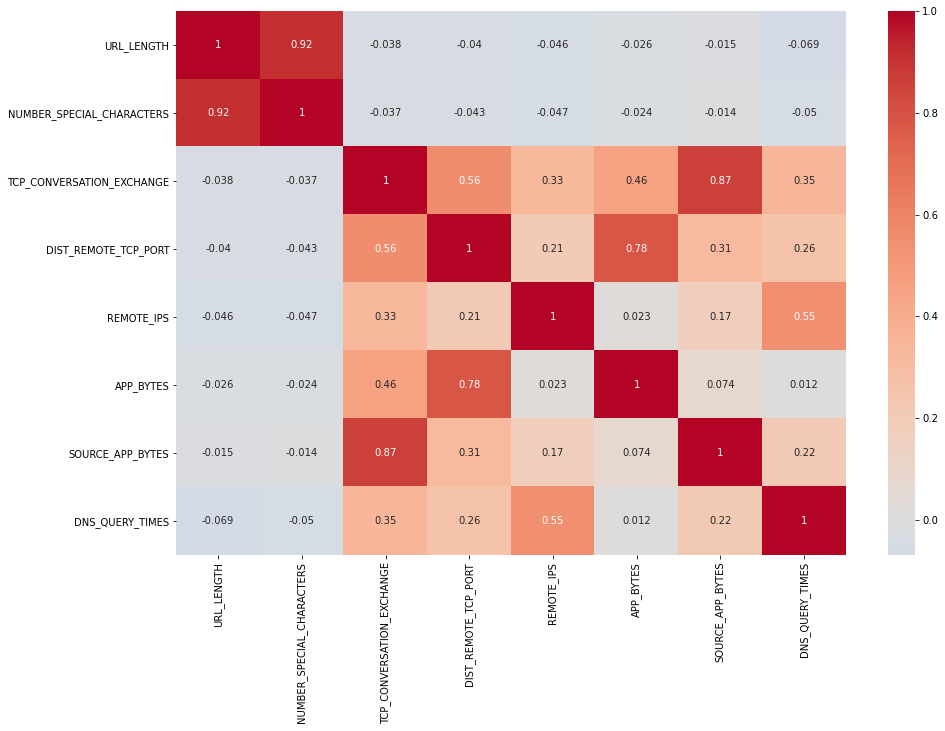

In [35]:
# Create heatmap
plt.subplots(1,1,figsize=(15,10))
sns.heatmap(numeric2.corr(), annot=True, cmap='coolwarm', center=0)

In [36]:
# Delete highest columns - 'NUMBER_SPECIAL_CHARACTERS'
numeric2.drop(columns='NUMBER_SPECIAL_CHARACTERS', inplace = True)
websites.drop(columns='NUMBER_SPECIAL_CHARACTERS', inplace = True)

# For all columns - for loop + VIF
[(variance_inflation_factor(numeric2.values, i), numeric2.columns[i]) for i in range(len(numeric2.columns))]

[(1.5806175127271658, 'URL_LENGTH'),
 (25.87434329338906, 'TCP_CONVERSATION_EXCHANGE'),
 (4.63696044947974, 'DIST_REMOTE_TCP_PORT'),
 (3.3070901278609335, 'REMOTE_IPS'),
 (9.595615703619158, 'APP_BYTES'),
 (17.499564115584786, 'SOURCE_APP_BYTES'),
 (3.1013809550068427, 'DNS_QUERY_TIMES')]

<AxesSubplot:>

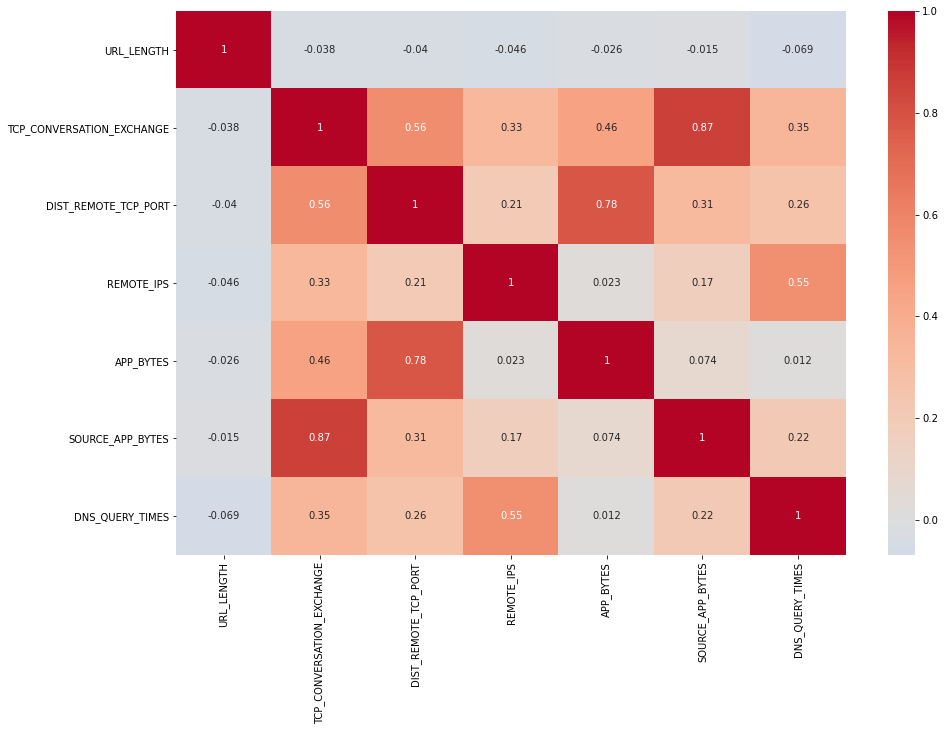

In [37]:
# Create heatmap
# There are no more +0.9 correlation 
plt.subplots(1,1,figsize=(15,10))
sns.heatmap(numeric2.corr(), annot=True, cmap='coolwarm', center=0)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [38]:
# df.isna.sum

websites.isna().sum()

URL                            0
URL_LENGTH                     0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [39]:
# CONTENT_LENGTH was already dropped and not considered for numeric data correlation, but it is still in the dataframe
# df.drop(columns)

websites.drop(columns='CONTENT_LENGTH', inplace=True)

In [40]:
# Check the rows were there are missing values 

websites[(websites['SERVER'].isna()|(websites['DNS_QUERY_TIMES'].isna()))]

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
1306,B0_2134,66,UTF-8,NaN,US,District of Columbia,1/02/2003 16:44,2/02/2017 17:11,15,2,4,1026,246,0.0,0
1659,B0_772,101,UTF-8,Apache,CA,ON,14/12/2009 0:00,13/12/2016 0:00,4,2,2,276,416,NaN,0


In [41]:
# As they are only 2 of them, I will delete them as will not make a significante change

websites.dropna(inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [42]:
# df.isna.sum
#Dataframe is cleaned

websites.isna().sum()

URL                          0
URL_LENGTH                   0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [43]:
# For the column ''WHOIS_COUNTRY', I have already made all capital letters
# Replace CP and GB

websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x.upper())
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].str.replace('Cyprus','CP')
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].str.replace("Unitet Kingdom|UK|.*\W.*",'GB', regex=True)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

<BarContainer object of 43 artists>

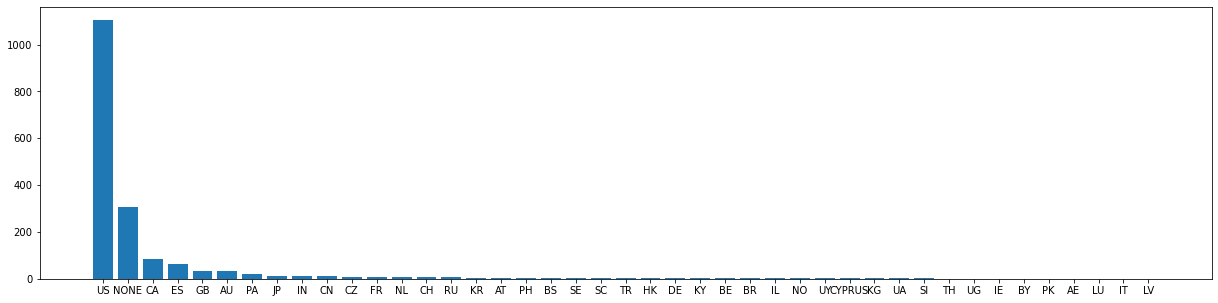

In [44]:
# Create a plot with matplotlib
# We can see that the majority of the observations are concentrated in just a few labels

plt.subplots(1,1,figsize=(21,5))
plt.bar(x=websites['WHOIS_COUNTRY'].value_counts().index, height= websites['WHOIS_COUNTRY'].value_counts().values)

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [45]:
# Create a list 
top_countries = websites['WHOIS_COUNTRY'].value_counts().nlargest(10).index.to_list()

# Apply changes
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x if x in top_countries else 'OTHER')

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [46]:
# df.drop(columns)

websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [47]:
# df.info()

websites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1779 non-null   object 
 1   URL_LENGTH                 1779 non-null   int64  
 2   CHARSET                    1779 non-null   object 
 3   SERVER                     1779 non-null   object 
 4   WHOIS_COUNTRY              1779 non-null   object 
 5   TCP_CONVERSATION_EXCHANGE  1779 non-null   int64  
 6   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 7   REMOTE_IPS                 1779 non-null   int64  
 8   APP_BYTES                  1779 non-null   int64  
 9   SOURCE_APP_BYTES           1779 non-null   int64  
 10  DNS_QUERY_TIMES            1779 non-null   float64
 11  Type                       1779 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 152.9+ KB


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [48]:
# df.drop(columns)

websites.drop(columns='URL', inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [49]:
# df.value_counts()
websites['CHARSET'].value_counts()

# Seems like we need the adjust all letters to upper case
websites['CHARSET'] = websites['CHARSET'].apply(lambda x: x.upper())

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [50]:
# Your code here
websites['SERVER'].value_counts()

Apache                                                                       385
nginx                                                                        211
None                                                                         175
Microsoft-HTTPAPI/2.0                                                        113
cloudflare-nginx                                                              94
                                                                            ... 
nginx/1.4.4                                                                    1
Apache/2.2.20 (Unix)                                                           1
Apache/2.4.10 (Debian) PHP/5.6.30-0+deb8u1 mod_perl/2.0.9dev Perl/v5.20.2      1
SSWS                                                                           1
barista/5.1.3                                                                  1
Name: SERVER, Length: 239, dtype: int64

![Think Hard](../images/think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [51]:
# Create a list of the 3 main servers
servers = ['Microsoft', 'Apache', 'nginx']

# Get the labels for thes 3 unique values
for i in servers:
    websites['SERVER'] = websites['SERVER'].apply(lambda x: i if i in x else x )

# Get the labels for Others
websites['SERVER'] = websites['SERVER'].apply(lambda x: x if x in servers else 'Other' ) 

In [52]:
# Count `SERVER` value counts here

websites['SERVER'].value_counts()

Apache       642
Other        504
nginx        435
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [53]:
# Your code here

website_dummy = pd.get_dummies(websites, drop_first=True)

In [54]:
websites['WHOIS_COUNTRY'].value_counts()

US       1105
NONE      306
OTHER     100
CA         83
ES         63
AU         35
GB         35
PA         21
JP         11
CN         10
IN         10
Name: WHOIS_COUNTRY, dtype: int64

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [55]:
# df.dtypes
# We can see there are no more categorical columns

website_dummy.dtypes

URL_LENGTH                     int64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_ISO-8859-1             uint8
CHARSET_NONE                   uint8
CHARSET_US-ASCII               uint8
CHARSET_UTF-8                  uint8
CHARSET_WINDOWS-1251           uint8
CHARSET_WINDOWS-1252           uint8
SERVER_Microsoft               uint8
SERVER_Other                   uint8
SERVER_nginx                   uint8
WHOIS_COUNTRY_CA               uint8
WHOIS_COUNTRY_CN               uint8
WHOIS_COUNTRY_ES               uint8
WHOIS_COUNTRY_GB               uint8
WHOIS_COUNTRY_IN               uint8
WHOIS_COUNTRY_JP               uint8
WHOIS_COUNTRY_NONE             uint8
WHOIS_COUNTRY_OTHER            uint8
WHOIS_COUNTRY_PA               uint8
WHOIS_COUNTRY_US               uint8
d

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [56]:
# Define Variables

y = website_dummy['Type']
X = website_dummy.drop(columns='Type')

In [57]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Use the module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [58]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Encapsule the model
model= LogisticRegression(max_iter=1000)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [59]:
# model.fit using only train data

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [61]:
# Import modules

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [63]:
# confussion matrix
# need to create y_pred

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[310,   5],
       [ 24,  17]], dtype=int64)

In [64]:
# Checking the accuracy score of the model

accuracy_score(y_test, y_pred)

0.9185393258426966

What are your thoughts on the performance of the model? Write your conclusions below.

In [65]:
# A classification report could help me a letter bit more with developing the conclusions

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       315
           1       0.77      0.41      0.54        41

    accuracy                           0.92       356
   macro avg       0.85      0.70      0.75       356
weighted avg       0.91      0.92      0.91       356



In [66]:
# From this report, the main conclusion that I can identify is that the Recall when the website is Malicious (1) is very low
# This means that only the 41% of the real malicious websites are identified

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [67]:
# Import module
from sklearn.neighbors import KNeighborsClassifier

#Create model
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [68]:
# create y_pred
y_pred = neigh.predict(X_test)

# Checking the accuracy score of the model
accuracy_score(y_test, y_pred)

0.9353932584269663

In [69]:
# We have improved the Recall for Malicious

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       315
           1       0.76      0.63      0.69        41

    accuracy                           0.94       356
   macro avg       0.86      0.80      0.83       356
weighted avg       0.93      0.94      0.93       356



#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [71]:
#Create model
neigh2 = KNeighborsClassifier(n_neighbors=5)
neigh2.fit(X_train, y_train)

# create y_pred
y_pred = neigh2.predict(X_test)

# Checking the accuracy score of the model
accuracy_score(y_test, y_pred)

0.9297752808988764

In [72]:
# We quality of the test has bee reduced

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       315
           1       0.74      0.61      0.67        41

    accuracy                           0.93       356
   macro avg       0.84      0.79      0.81       356
weighted avg       0.93      0.93      0.93       356



# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [73]:
# Let's start from beginning challenge 6
# Define Variables

y = website_dummy['Type']
X = website_dummy.drop(columns='Type')

In [74]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Import module 
from sklearn.preprocessing import RobustScaler

# Create the scaler and eliminate outliers under 10% and 90%
X_train2 = RobustScaler(quantile_range = (0.1,0.9)).fit_transform(X_train)
X_test2 = RobustScaler(quantile_range = (0.1,0.9)).fit_transform(X_test)


In [76]:
# Encapsule the model
model2= LogisticRegression(max_iter=2000)

# model.fit using only train data
model2.fit(X_train2, y_train)

model2.score(X_test2, y_test)

0.898876404494382

In [77]:
# confussion matrix
# need to create y_pred

y_pred = model.predict(X_test2)
confusion_matrix(y_test, y_pred)

array([[286,  29],
       [ 15,  26]], dtype=int64)

In [78]:
# With the classification report, we can see that despite having worse ratios for finding Benign websites, this model predicts better a Malicious website 

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       315
           1       0.47      0.63      0.54        41

    accuracy                           0.88       356
   macro avg       0.71      0.77      0.74       356
weighted avg       0.90      0.88      0.88       356

